In [19]:
# Import all the python modules required for the project

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import accuracy_score
from joblib import dump, load

In [31]:
# Load the trained model (the joblib file)

model = load('covid-19detection.joblib')

In [32]:
# Hide Warnings from the output

warnings.filterwarnings("ignore", category=UserWarning)

In [43]:
# Test model with two sample input datasets
feature_names = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market']

input_data = ([[0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0], 
                             [0,1,1,1,0,1,1,1,0,0,1,0,1,1,0,0,0,1,1,0],
                              [0,1,1,1,0,1,1,1,0,0,1,0,1,1,0,1,0,1,1,0],
                              [1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,1]])

prediction = model.predict(input_data)



for i, input_row in enumerate(input_data):
    feature_dict = dict(zip(feature_names, input_row))
    prediction_dict = {'Covid-19 Detection Result ': prediction[i]}
    output_dict = {**feature_dict, **prediction_dict}
    print(output_dict, '\n')

{'Breathing Problem': 0, 'Fever': 0, 'Dry Cough': 0, 'Sore throat': 0, 'Running Nose': 1, 'Asthma': 0, 'Chronic Lung Disease': 0, 'Headache': 1, 'Heart Disease': 0, 'Diabetes': 0, 'Hyper Tension': 0, 'Fatigue ': 1, 'Gastrointestinal ': 0, 'Abroad travel': 0, 'Contact with COVID Patient': 0, 'Attended Large Gathering': 1, 'Visited Public Exposed Places': 1, 'Family working in Public Exposed Places': 1, 'Wearing Masks': 0, 'Sanitization from Market': 0, 'Covid-19 Detection Result ': 'No Covid'} 

{'Breathing Problem': 0, 'Fever': 1, 'Dry Cough': 1, 'Sore throat': 1, 'Running Nose': 0, 'Asthma': 1, 'Chronic Lung Disease': 1, 'Headache': 1, 'Heart Disease': 0, 'Diabetes': 0, 'Hyper Tension': 1, 'Fatigue ': 0, 'Gastrointestinal ': 1, 'Abroad travel': 1, 'Contact with COVID Patient': 0, 'Attended Large Gathering': 0, 'Visited Public Exposed Places': 0, 'Family working in Public Exposed Places': 1, 'Wearing Masks': 1, 'Sanitization from Market': 0, 'Covid-19 Detection Result ': 'Covid-19 Dete

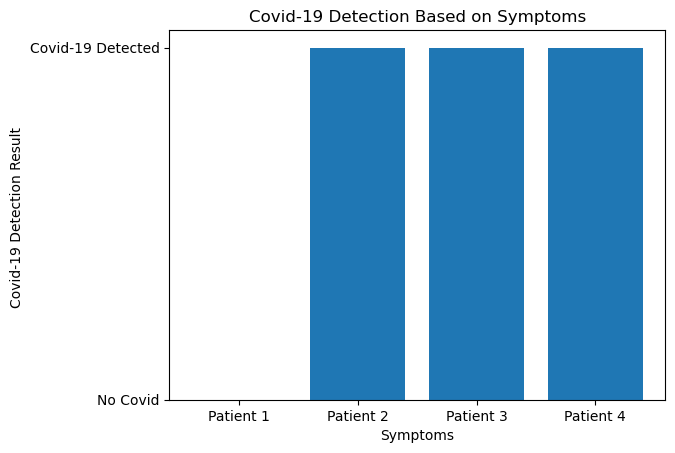

In [44]:
predictions = model.predict(input_data)

covid_19_detection = [prediction for prediction in predictions]

fig, ax = plt.subplots()
ax.bar(['Patient 1', 'Patient 2', 'Patient 3', 'Patient 4'], covid_19_detection)
ax.set_xlabel('Symptoms')
ax.set_ylabel('Covid-19 Detection Result ')
ax.set_title('Covid-19 Detection Based on Symptoms')

plt.show()